==== Category Test Evaluation ====
              precision    recall  f1-score   support

          과제       1.00      0.33      0.50         3
          기타       0.67      1.00      0.80         2
          발표       0.67      1.00      0.80         2
          시험       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.58      0.58      0.53         8
weighted avg       0.71      0.62      0.59         8



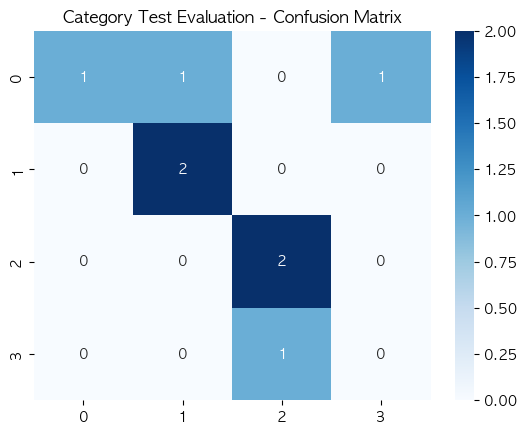

==== Priority Test Evaluation ====
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.67      1.00      0.80         2
      Medium       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.49      0.60      0.53         8
weighted avg       0.67      0.75      0.70         8



/Users/jihyun/HUFS-LAI-ML-2025-2/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/jihyun/HUFS-LAI-ML-2025-2/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/jihyun/HUFS-LAI-ML-2025-2/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

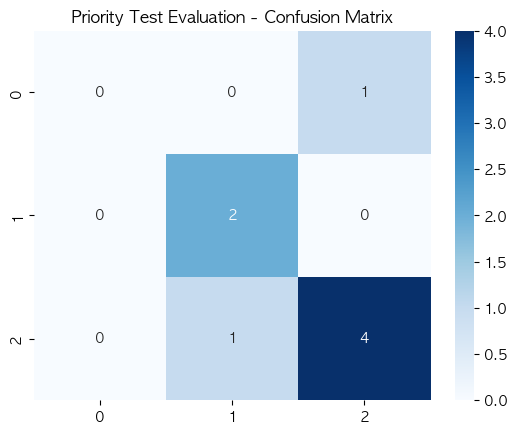

In [2]:
# -----------------------------------------
# 1. Import Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# -----------------------------------------
# 2. Load Data
# -----------------------------------------
df = pd.read_csv("data/schedule_data.csv")

X_text = df["text"]
X_num = df[["days_left", "contains_keyword"]]

y_category = df["category"]
y_priority = df["priority"]

# Load preprocessors
tfidf = joblib.load("tfidf_vectorizer.pkl")
scaler = joblib.load("feature_scaler.pkl")

# Load models
cat_model = joblib.load("category_model.pkl")
pri_model = joblib.load("priority_model.pkl")

# -----------------------------------------
# 3. TF-IDF + Scaling (전체 데이터)
# -----------------------------------------
X_text_tfidf = tfidf.transform(X_text)
X_num_scaled = scaler.transform(X_num)

from scipy.sparse import hstack
X_total = hstack((X_text_tfidf, X_num_scaled))

# -----------------------------------------
# 4. Train/Val/Test Split (같은 seed 사용)
# -----------------------------------------
from sklearn.model_selection import train_test_split

X_text_train, X_text_temp, X_num_train, X_num_temp, y_cat_train, y_cat_temp, y_pri_train, y_pri_temp = train_test_split(
    X_text, X_num, y_category, y_priority,
    test_size=0.30, stratify=y_category, random_state=42
)

X_text_val, X_text_test, X_num_val, X_num_test, y_cat_val, y_cat_test, y_pri_val, y_pri_test = train_test_split(
    X_text_temp, X_num_temp, y_cat_temp, y_pri_temp,
    test_size=0.50, stratify=y_cat_temp, random_state=42
)

# test set transform
X_test_tfidf = tfidf.transform(X_text_test)
X_test_num_scaled = scaler.transform(X_num_test)
X_test = hstack((X_test_tfidf, X_test_num_scaled))


# -----------------------------------------
# 5. Evaluation Function
# -----------------------------------------
def evaluate(model, X, y_true, title=""):
    pred = model.predict(X)
    print(f"==== {title} ====")
    print(classification_report(y_true, pred))
    
    cm = confusion_matrix(y_true, pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"{title} - Confusion Matrix")
    plt.show()

# -----------------------------------------
# 6. Evaluate Category Model
# -----------------------------------------
evaluate(cat_model, X_test, y_cat_test, title="Category Test Evaluation")

# -----------------------------------------
# 7. Evaluate Priority Model
# -----------------------------------------
evaluate(pri_model, X_test, y_pri_test, title="Priority Test Evaluation")
